# Classification Tree or Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
credit_df = pd.read_csv('Datasets/german.data', 
                        names=['checking_account', 'duration', 'credit_history', 'purpose', 
                               'credit_amount', 'savings_acc', 'present_emp_since', 'inst_rate', 
                                'personal_status', 'other_debtors', 'residing_since', 'property', 
                            'age', 'inst_plans', 'housing', 'existing_credits', 'job', 
                            'no_of_people_liable', 'telephone', 'foreign_worker', 'status'], sep = ' ')

In [3]:
credit_df.head()

,checking_account,duration,credit_history,purpose,credit_amount,savings_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,existing_credits,job,no_of_people_liable,telephone,foreign_worker,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   checking_account     1000 non-null   object
 1   duration             1000 non-null   int64 
 2   credit_history       1000 non-null   object
 3   purpose              1000 non-null   object
 4   credit_amount        1000 non-null   int64 
 5   savings_acc          1000 non-null   object
 6   present_emp_since    1000 non-null   object
 7   inst_rate            1000 non-null   int64 
 8   personal_status      1000 non-null   object
 9   other_debtors        1000 non-null   object
 10  residing_since       1000 non-null   int64 
 11  property             1000 non-null   object
 12  age                  1000 non-null   int64 
 13  inst_plans           1000 non-null   object
 14  housing              1000 non-null   object
 15  existing_credits     1000 non-null   int64 
 16  job    

## Attribute Description

- checking_account (Object)
    - A11 : ...< 0 DM
    - A12 : 0 <= ... < 200 DM
    - A13 : ... >= 200 DM
    - A14 : no checking account

- duration (int64) in months

- credit_history (Object)
    - A30 : no credits taken / all credits paid back duly
    - A31 : all credits at this bank paid back duly
    - A32 : existing credits paid back duly till now
    - A33 : delay in paying off in the past
    - A34 : critical account / other credits existing (not at this bank)

- purpose (Object)
    - A40 : car (new)
    - A41 : car (used)
    - A42 : furniture/equipment
    - A43 : radio/television
	- A44 : domestic appliances
	- A45 : repairs
	- A46 : education
	- A47 : (vacation - does not exist?)
	- A48 : retraining
	- A49 : business
	- A410 : others

- credit_amount (int64)

- saving_acc (Object)
    - A61 :   ... <  100 DM
	- A62 :   100 <= ... <  500 DM
	- A63 :   500 <= ... < 1000 DM
	- A64 :   .. >= 1000 DM
    - A65 :   unknown/ no savings account

- present_emp_since (Object)
    - A71 : unemployed
	- A72 : ... < 1 year
	- A73 : 1  <= ... < 4 years  
	- A74 : 4  <= ... < 7 years
	- A75 : .. >= 7 years

- inst_rate (int64) in percentage

- personal_status (Object)
    - A91 : male   : divorced/separated
	- A92 : female : divorced/separated/married
    - A93 : male   : single
	- A94 : male   : married/widowed
	- A95 : female : single

- other_debtors (Object)
    - A101 : none
	- A102 : co-applicant
	- A103 : guarantor

- residing_since (int64)

- property (Object)
    - A121 : real estate
	- A122 : if not A121 : building society savings agreement / life insurance
    - A123 : if not A121/A122 : car or other, not in attribute 6
	- A124 : unknown / no property

- age (int64)

- inst_plans (Object)
    - A141 : bank
	- A142 : stores
	- A143 : none

- housing (Object)
    - A151 : rent
	- A152 : own
	- A153 : for free

- existing_credits (int64)

- job (Object)
    - A171 : unemployed/ unskilled  - non-resident
	- A172 : unskilled - resident
	- A173 : skilled employee / official
	- A174 : management/ self-employed / highly qualified employee/ officer

- no_of_people_liable (int64)

- telephone (Object)
    - A191 : none
	- A192 : yes, registered under the customers name

- foreign_worker (Object)
    - A201 : yes
	- A202 : no

- Status (int64)
	- 1 : Good
	- 2 : Bad

In [5]:
credit_df.iloc[:5, :7]

,checking_account,duration,credit_history,purpose,credit_amount,savings_acc,present_emp_since
0,A11,6,A34,A43,1169,A65,A75
1,A12,48,A32,A43,5951,A61,A73
2,A14,12,A34,A46,2096,A61,A74
3,A11,42,A32,A42,7882,A61,A74
4,A11,24,A33,A40,4870,A61,A73


In [6]:
credit_df.iloc[:5, 7:]

,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,existing_credits,job,no_of_people_liable,telephone,foreign_worker,status
0,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [7]:
credit_df.status.value_counts()

status
1    700
2    300
Name: count, dtype: int64

In [8]:
credit_df.status = credit_df.status.map({1:0, 2:1})  # 1 -> Good (0), 2 -> Bad (1)
credit_df.status.value_counts()

status
0    700
1    300
Name: count, dtype: int64

In [9]:
# Seperating X_features and Y_features
X_features = list(credit_df.columns)
X_features.remove('status')
X_features

['checking_account',
 'duration',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'other_debtors',
 'residing_since',
 'property',
 'age',
 'inst_plans',
 'housing',
 'existing_credits',
 'job',
 'no_of_people_liable',
 'telephone',
 'foreign_worker']

In [10]:
# Encoding Categorical Features
encoded_credit_df = pd.get_dummies(credit_df[X_features], drop_first=True, dtype=int)

In [11]:
pd.set_option('display.max_columns', None)
encoded_credit_df.head()

,duration,credit_amount,inst_rate,residing_since,age,existing_credits,no_of_people_liable,checking_account_A12,checking_account_A13,checking_account_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_acc_A62,savings_acc_A63,savings_acc_A64,savings_acc_A65,present_emp_since_A72,present_emp_since_A73,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,other_debtors_A102,other_debtors_A103,property_A122,property_A123,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,6,1169,4,4,67,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0


In [12]:
# adding a constant column in X for intercept
import statsmodels.api as sm
X = encoded_credit_df
Y = credit_df.status

In [13]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Building Decision Tree Classifier using Gini Criteria

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

In [15]:
clf_tree.fit(X_train, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Measuring Test Accuracy

In [16]:
tree_predict = clf_tree.predict(X_test)
metrics.roc_auc_score(Y_test, tree_predict)

0.5835743204164258

### Displaying the Tree

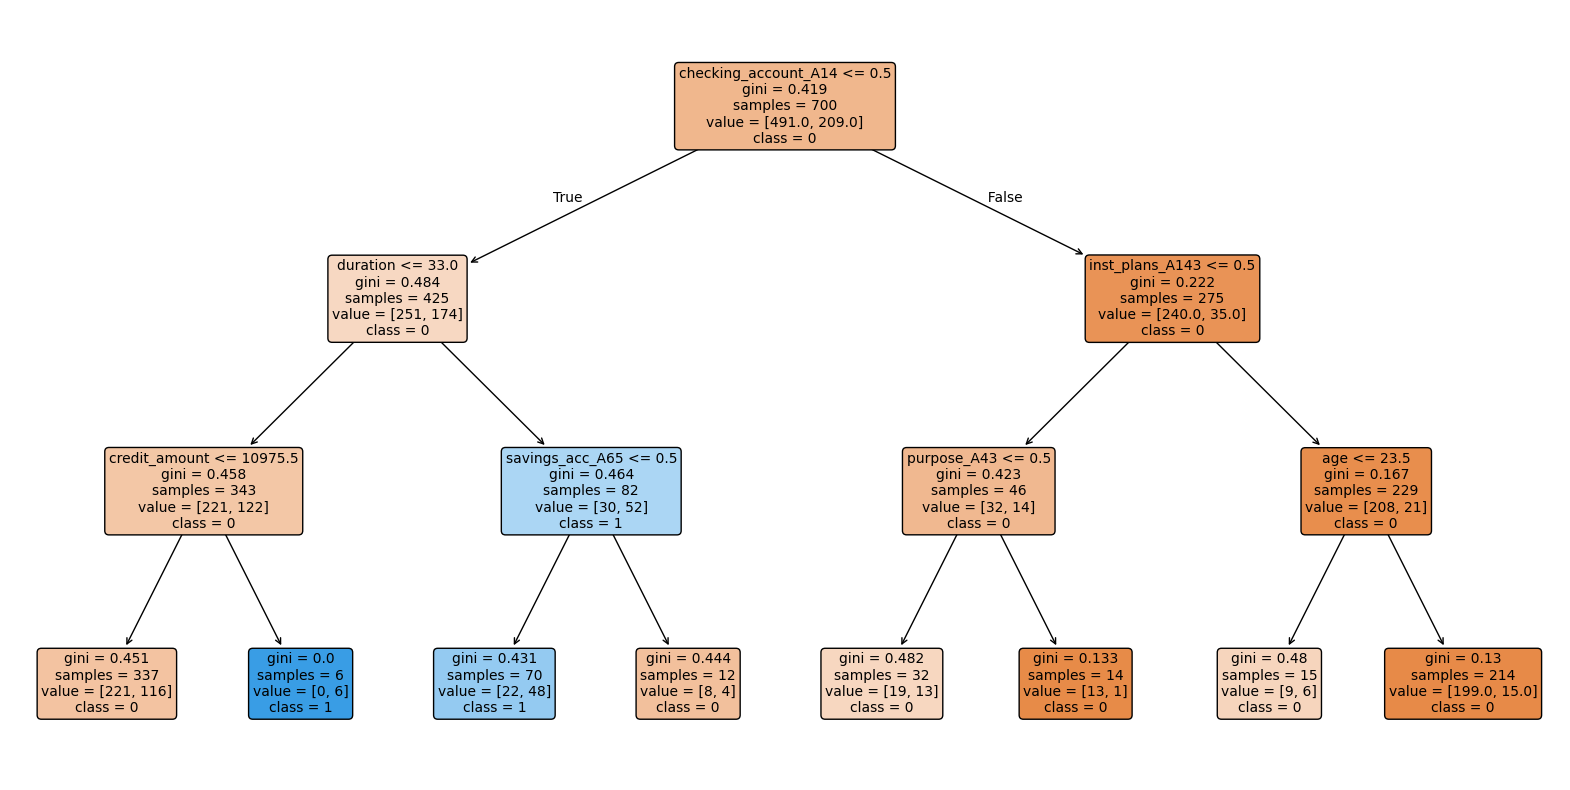

In [19]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf_tree, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True, 
          rounded=True,
          fontsize=10)
plt.show()

From the above decision tree, it can be interpreted that
- At the top node, there are 700 observations of which 491 are good credits and 209 are bad credits. The corresponding Gini index is 0.419.
- checkin_acc_A14 is the most important feature and hence, chosen as the top splitting criteria.
- The first rule means if the customer has checkin_account_A14 account or not.
- This rule has split the dataset into two subsets represented by the second level nodes. On the left node, there are 425 samples (i.e., not having checkin_account_A14) and on the right node, there are 275 samples (i.e. having checkin_account_A14).
- One of the rules can be interpreted as: If the customer does not have checkin_account_A14 and credit duration is less than 33 and does not have saving_acc_A65, then there is high probability of being a bad credit. There are 70 records in the dataset that satisfy these conditions and 48 of them have bad credit.
- Another rule: If the customer has checkin_acc_A14 and Inst_plans_A143 and age is more than 23.5, then there is high probability of being a good credit.